In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy import integrate
import math as m
import scipy.linalg as la
import scipy.sparse.linalg as sla

In [3]:
def WaveOld(A, x):
    return A*np.exp(-x**2/4)

def Wave(A, x):
    lam = 0.1
    return np.cos(2*np.pi / lam * x)

def WaveP(A, x, v, t):
    return Wave(A, x-v*t)

def WaveN(A, x, v, t):
    return Wave(A, x+v*t)

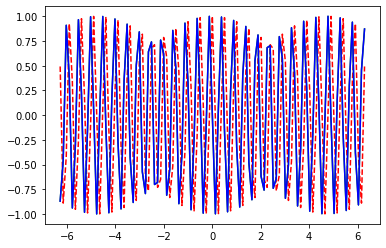

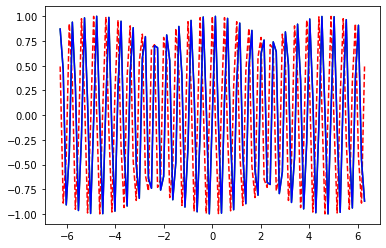

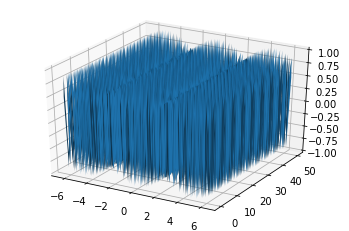

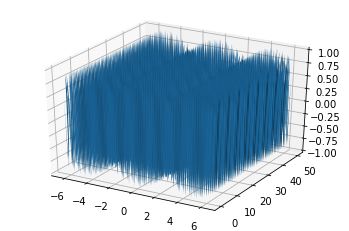

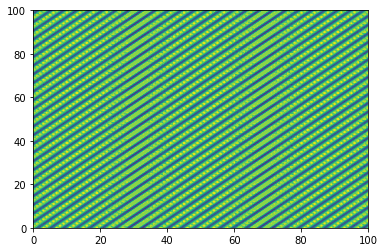

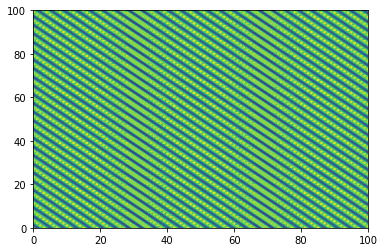

In [4]:
x_min = -2*np.pi
x_max = 2*np.pi
Nx = 101

x = []

for i in range(Nx):
    x.append(x_min + (x_max - x_min)/(Nx-1)*(i))
    
t_min = 0
t_max = 50
v = 0.05
Nt = 101

t = []

for j in range(Nt):
    t.append(t_min + ((t_max - t_min)/(Nt - 1))*(j))
    
M1 = np.zeros((Nt, Nx), dtype=np.float64)
M2 = np.zeros((Nt, Nx), dtype=np.float64)

for i in range(Nt):
    for j in range(Nx):
        M1[i, j] = WaveP(1, x[j], v, t[i])
        M2[i, j] = WaveN(1, x[j], v, t[i])
        
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
p1 = ax1.plot(x, M1[0,:],'r--', x, M1[39,:],'g', x, M1[79,:],'b')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
p2 = ax2.plot(x, M2[0,:],'r--', x, M2[39,:],'g', x, M2[79,:],'b')

X, Y = np.meshgrid(x, t)

fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')
p3 = ax3.plot_surface(X, Y, M1)

fig4 = plt.figure()
ax4 = fig4.add_subplot(111, projection='3d')
p4 = ax4.plot_surface(X, Y, M2)

fig5 = plt.figure()
ax5 = fig5.add_subplot(111)
p5 = ax5.contourf(M1, 15)

fig6 = plt.figure()
ax6 = fig6.add_subplot(111)
p6 = ax6.contourf(M2, 15)

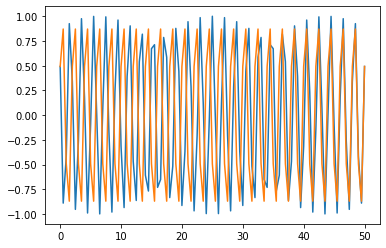

In [5]:
plt.plot(t, M1[0, :]) # 0 по времени
plt.plot(t, M1[:, 0]) # 0 по X


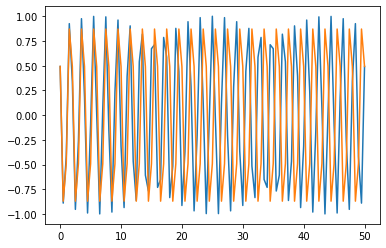

In [6]:
plt.plot(t, M2[0, :]) # 0 по времени
plt.plot(t, M2[:, 0]) # 0 по X

In [7]:
i1 = np.where(M1[:,0] <= M1[0,0])[0][1]
i2 = np.where(M1[0, :] <= M1[0,0])[0][1]
T1 = t[np.where(M1[i1:,0] >= M1[0,0])[0][1]] - t_min
T2 = x[np.where(M1[0,i2:] >= M1[0,0])[0][1]] - x_min
print(T1, T2, T2/T1)

3.0 0.7539822368615505 0.2513274122871835


### Task 2

In [5]:
def Intensity1(Lambda, N, A, R0, r, Nb):
    
    Rr= np.zeros(N, dtype=np.float64)
    f = np.zeros(Nb, dtype=np.float64)
    
    for i in range(N):
        Rr[i] = np.linalg.norm(r - R0[:,i])
        
    for i in range(Nb):
        su = 0
        
        for j in range(N):
            su += (A[j]/Rr[j]*np.cos(2*np.pi/Lambda*Rr[j]-2*np.pi/Nb*i))
        f[i] = su**2
        
    return np.mean(f)

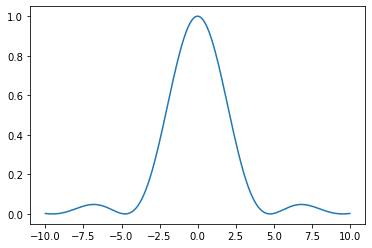

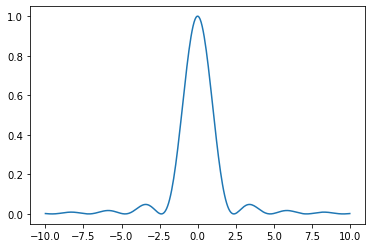

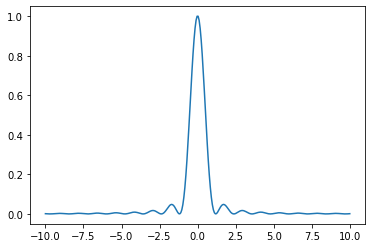

In [78]:
# Протяженный источник
def longInst(Lm=200):
    N = 21
    A = [1 for i in range(N)]
    Lambda = 5e-4

    R = np.zeros((N, 3))
    for i in range(21):
        R[:, 2][i] = -0.01 + i * 0.001
    R = R.T

    Np = 300
    z_min = -10
    z_max = 10

    z = np.zeros(Np, dtype=np.float64)

    for i in range(Np):
        z[i] = z_min + (z_max - z_min)/(Np - 1)*(i)

    L = Lm
    Nb = 3
    I1 = np.zeros(Np, dtype=np.float64)

    for i in range(Np):
        r = np.array([0, L, z[i]]).T
        I1[i] = Intensity1(Lambda, N, A, R, r, Nb)

    I1max = np.amax(I1)
    fig8 = plt.figure()
    ax8 = fig8.add_subplot(111)
    p8 = ax8.plot(z, I1/I1max)

longInst(Lm = 200)
longInst(Lm = 100)
longInst(Lm = 50)

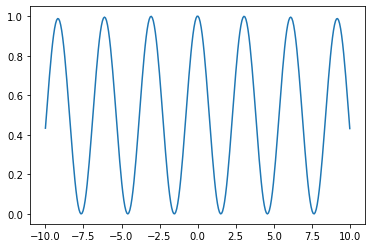

In [73]:
# Две протяженные щели
# При достаточном удалении от площадки, распределение интенсивности становится 1 к 1 как от двух точечных щелей
N = 40
A = [1 for i in range(N)]
Lambda = 5e-4

R = np.zeros((N, 3))
for i in range(round(N/2)):
    R[:, 2][i] = -0.05 - N/4 * 0.0001 + i * 0.0001
    
for i in range(round(N/2), N):
    R[:, 2][i] = 0.05 + N/4 *0.0001 - i * 0.0001
R = R.T

Np = 300
z_min = -10
z_max = 10

z = np.zeros(Np, dtype=np.float64)

for i in range(Np):
    z[i] = z_min + (z_max - z_min)/(Np - 1)*(i)
    
L = 600
Nb = 3
I1 = np.zeros(Np, dtype=np.float64)

for i in range(Np):
    r = np.array([0, L, z[i]]).T
    I1[i] = Intensity1(Lambda, N, A, R, r, Nb)
    
I1max = np.amax(I1)
fig8 = plt.figure()
ax8 = fig8.add_subplot(111)
p8 = ax8.plot(z, I1/I1max)

### Task 3

In [16]:
def CoeffRefraction(y, a, alpha, betta):
    return (1+a*y**alpha)**betta

In [17]:
def simulation(a, alpha, betta):
    y_min = 1e-5
    y_max = 20
    Np = 100

    y = []

    for i in range(Np):
        y.append(y_min + (y_max - y_min)/(Np-1)*(i))

    Nk = 1000

    Y = np.zeros(Nk, dtype=np.float64)
    Z = np.zeros(Nk, dtype=np.float64)

    Xb = np.zeros(Np, dtype=np.float64)
    Yb = np.zeros(Np, dtype=np.float64)

    for i in range(Np):
        for k in range(Nk):
            Y[k] = y_min + (y[i] - y_min)/(Nk -1)*(k)
            Z[k] = 1/((CoeffRefraction(Y[k], a, alpha, betta)**2-1)**0.5)

        Xb[i] = np.trapz(Z, Y)
        Yb[i] = Y[Nk-1]

    fig12 = plt.figure()
    ax12 = fig12.add_subplot(111)
    p12 = ax12.plot(Xb, Yb)

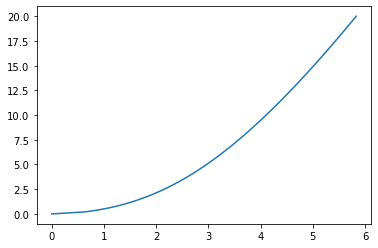

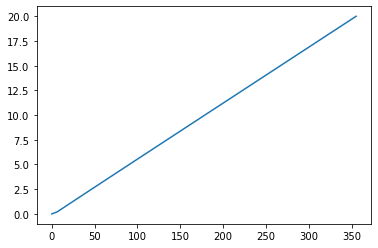

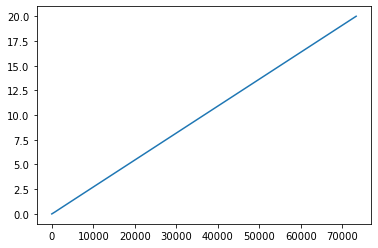

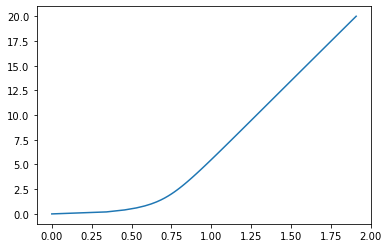

In [40]:
simulation(1, 1, 1)
simulation(2, 2, 2)
simulation(3, 3, 3)
simulation(1, 1, 3)